In [1]:
#import required python libraries
import numpy as np                                # For all numpy array arthemetic opertions 
import pandas as pd                               # For Data frames 
import math                                       # For doing maths calulations
from sklearn.linear_model import LinearRegression # For Inbuilt linear regression modules
from sklearn.metrics import mean_squared_error    # For mean squared error evaluation
import matplotlib.pyplot as plt                   # For data visualization various plots
import seaborn as sns                             # For data visualization 
from sklearn.linear_model import SGDRegressor     # For Stochastic Gradient Decent 
from sklearn.preprocessing import StandardScaler  # For scaling down data set to ease out mathematical calculations
from sklearn.metrics import r2_score              # For calculating R2 Score

In [2]:
#Getting given dataset into Dataframe
dataset = pd.read_csv('Data_miniproject.csv')     # Used CSV file is available at same code location

# Exploratory Data Analysis

In [3]:
#Get first 5 rows from given dataset 
dataset.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Rename Weight1 for better clarity while doing data exploration
dataset.rename(columns={"Weight1": "Expanded_Weight"},inplace = True)

In [5]:
#decribe how the given data looks like
dataset.describe()

,Cost,Weight,Expanded_Weight,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Key Inference :
1. Minimum cost as 0 for a bag. May not be valid data point. Will be considered as outlier 
2. Max cost is 1650 
3. Average cost is around 400
4. Standard deviation should not be zero for any feature else its not much useful for any statistiscal analysis


In [6]:
# Get the insight about data types 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
Cost               159 non-null float64
Weight             159 non-null float64
Expanded_Weight    159 non-null float64
Length             159 non-null float64
Height             159 non-null float64
Width              159 non-null float64
dtypes: float64(6)
memory usage: 7.6 KB


Key Inference :
    1. Total data set size : 159
    2. No null data points
    3. All data types are float
    4. Two inputs for weights, need to see the significance as we move on.

In [7]:
# Check for Duplicates & drop if any 
dataset = dataset.drop_duplicates(keep='first')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 6 columns):
Cost               159 non-null float64
Weight             159 non-null float64
Expanded_Weight    159 non-null float64
Length             159 non-null float64
Height             159 non-null float64
Width              159 non-null float64
dtypes: float64(6)
memory usage: 8.7 KB


Key Inference :
No duplicates found in given dataset, data set still contains 159 rows.

In [8]:
#Shape of the dataset
dataset.shape

(159, 6)

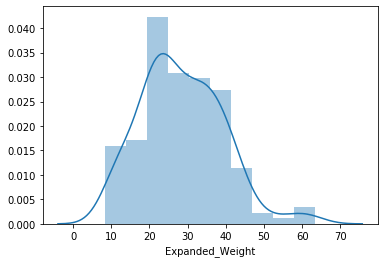

In [9]:
#Lets see the distribution of given data
sns.distplot(dataset['Expanded_Weight'],10)

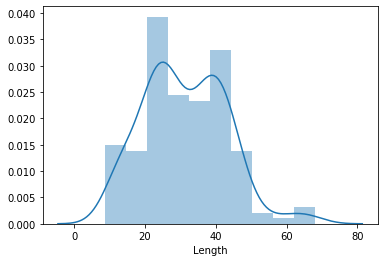

In [10]:
sns.distplot(dataset['Length'],10)

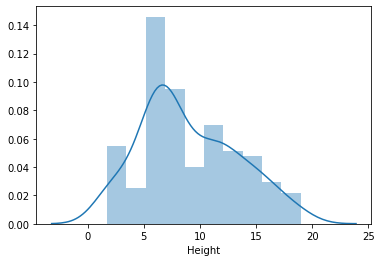

In [11]:
sns.distplot(dataset['Height'],10)

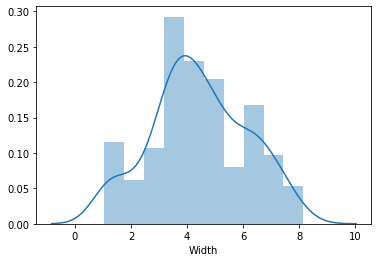

In [12]:
sns.distplot(dataset['Width'],10)

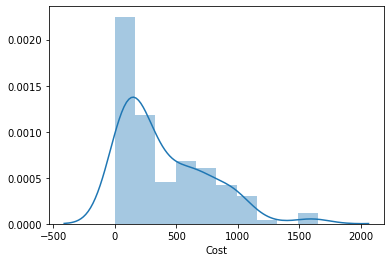

In [13]:
sns.distplot(dataset['Cost'],10)

Key Inference :
    1. The given data is right skewed. Mean is greater than the median. 
    

In [14]:
dataset_num=dataset.select_dtypes(include=['float64','int64'])
dataset_num.head()

#No change for us but if you have mixed datatype, above method is to extract only numerical datatype.
# Its good practice to ensure only numerical data is used for calculating correlation coefficients. 

,Cost,Weight,Expanded_Weight,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [15]:
#Find the correlation with the variable of interest
dataset_corr = dataset.corr()['Cost'][:-1]
dataset_corr

Cost               1.000000
Weight             0.915712
Expanded_Weight    0.918618
Length             0.923044
Height             0.724345
Name: Cost, dtype: float64

Key Inference
1. Weight & Expanded_Weight are almost impacting the Cost same way 0.91 so we might consider to remove one attribute.
2. Expanded_Weight has slightly higher correlation with cost incompare to weight. We might build model with both or any one for better results. 

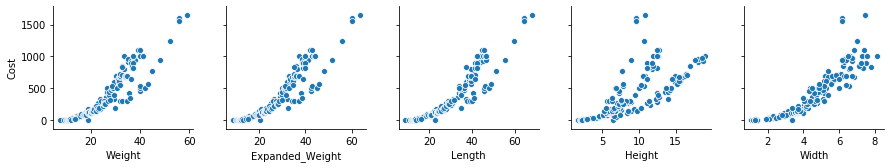

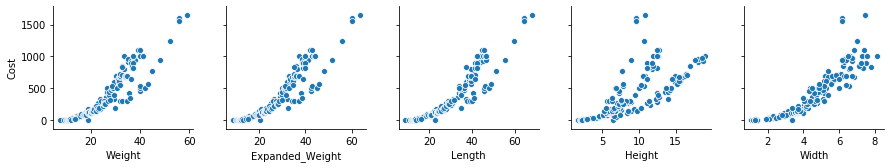

In [16]:
#correaltion plots using 'pairplot' to see the relationship for all features with the dependent varaiable 'Cost'.
for i in range (0,len(dataset.columns),5):
    sns.pairplot(dataset,y_vars=['Cost'],x_vars=dataset.columns[1:1+5])

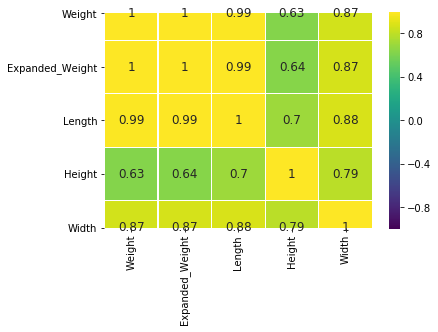

In [17]:
# plotting using correlation heatmap 
# If number of features are too much, it is visually hard to interpret and infer from the matrix.
# We will use heat maps, which can help relate the co-occurrences graphically.

corr = dataset.drop('Cost',axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr  <= -0.4)],
            cmap='viridis', vmax=1.0,vmin=-1.0, linewidth=0.1,
            annot=True, annot_kws={"size":12}, square=True);

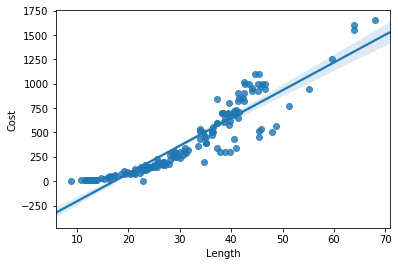

In [18]:
#regression plot : To get the direction of relationship between given features & dependent variable 'Cost'
sns.regplot(dataset['Length'],dataset['Cost'])

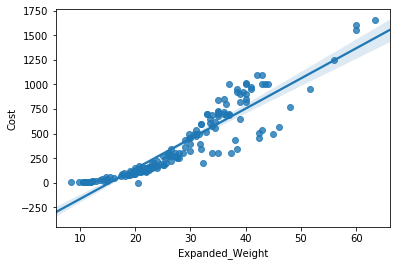

In [19]:
sns.regplot(dataset['Expanded_Weight'],dataset['Cost'])

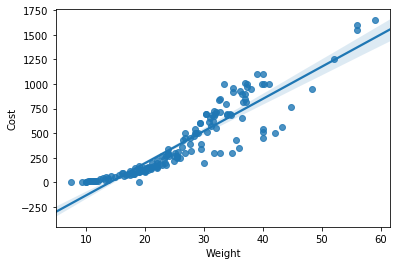

In [20]:
sns.regplot(dataset['Weight'],dataset['Cost'])

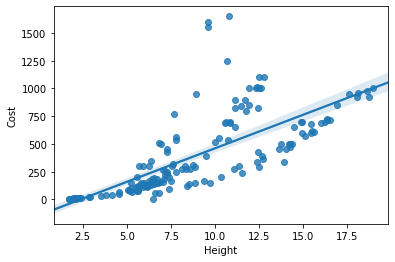

In [21]:
sns.regplot(dataset['Height'],dataset['Cost'])

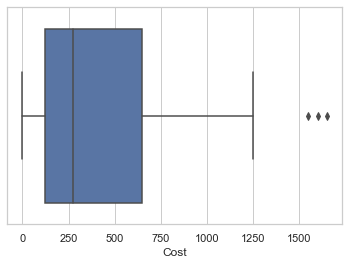

In [22]:
# Finding outliers using box plot 
# To visulize the data in minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum” range. 
# It can tell you about your outliers and what their values are. 
# It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Cost"])

We could see 3 outliers in Cost data. We will experiment with & without removing these outliers while building model. 

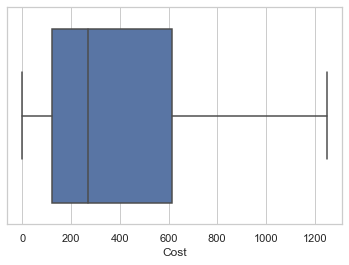

In [23]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#Cost Outliers
lowerbound,upperbound = outlier_treatment(dataset['Cost'])
indexName = dataset[(dataset['Cost'] < lowerbound) | (dataset['Cost'] > upperbound)].index
dataset.drop(indexName, inplace=True)

sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Cost"])

Note : We removed the outlier but when tried without outliers, R2 value decreased by 4%. Hence IQR methodology for data cleaning is not effective for given dataset. We will retain these outliers in algorithms. 

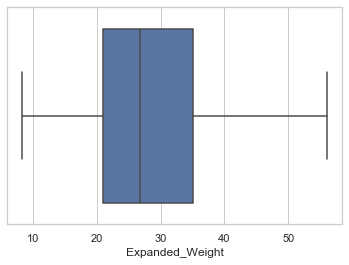

In [24]:
#Finding outliers using box plot 
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Expanded_Weight"])

Couple of outliers with Weight1 feature as well.

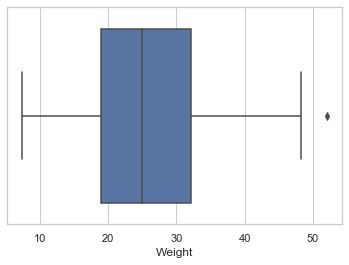

In [25]:
#Finding outliers using box plot 
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Weight"])

Since Weight & Weight1 are highly correlated, we could also see 2 outliers with Weight1 as well. 

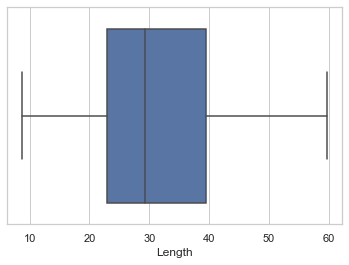

In [26]:
ax = sns.boxplot(x=dataset["Length"])

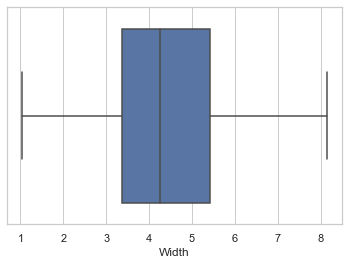

In [27]:
ax = sns.boxplot(x=dataset["Width"])

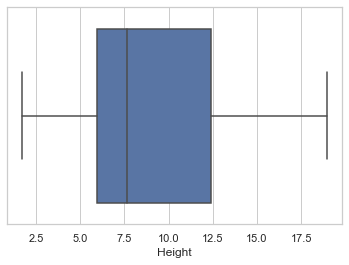

In [28]:
ax = sns.boxplot(x=dataset["Height"])

# Exploratory Data Analysis : Data Cleaning

In [29]:
# Reading again the dataset as we removed outliers using IQR for Cost
#Getting given dataset into Dataframe

dataset = pd.read_csv('Data_miniproject.csv')     # Used CSV file is available at same code location

In [30]:
#Get the set of data having cost as 0 or less than 0
dataset_cost_0 = dataset.loc[dataset['Cost'] <= 0]
print (dataset_cost_0)

    Cost  Weight  Weight1  Length  Height   Width
40   0.0    19.0     20.5    22.8  6.4752  3.3516


We got one row with 0 as cost. It is an outlier and would impact the model. Hence we should drop this tuple.

In [31]:
#Cost 0 is an outlier and should be dropped for better algorithm 
indexName = dataset[ dataset['Cost'] <= 0].index
dataset.drop(indexName, inplace=True)
dataset.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Now the minimum cost is not 0, it means we sucessfully removed the outlier.

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 158
Data columns (total 6 columns):
Cost       158 non-null float64
Weight     158 non-null float64
Weight1    158 non-null float64
Length     158 non-null float64
Height     158 non-null float64
Width      158 non-null float64
dtypes: float64(6)
memory usage: 8.6 KB


Data set reduced by 1 and no null value is also introduced. 

In [33]:
#Expanded_Weight (Weight1) is exactly same as Weight and does not bring much value. 
drop_cols = ['Weight']
dataset = dataset.drop(drop_cols, axis=1)
dataset.head()

,Cost,Weight1,Length,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


Keeping Expanded weight as it has slightly better correlation as Weight

In [34]:
# Extract the data set into X & y to process further.
y = dataset.pop('Cost')
X = dataset.copy()

In [35]:
#Standardize features by removing the mean and scaling to unit variance for all given features
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)
print(X)

      Weight1    Length    Height     Width
0   -0.286587 -0.110466  0.591654 -0.240092
1   -0.202457 -0.006935  0.815870 -0.070461
2   -0.183761 -0.015562  0.792000  0.161475
3    0.049934  0.191499  0.874260  0.018572
4    0.049934  0.234637  0.807462  0.421564
..        ...       ...       ...       ...
153 -1.520498 -1.542642 -1.610713 -1.800030
154 -1.501803 -1.534015 -1.531396 -1.874035
155 -1.445716 -1.508132 -1.567130 -1.881876
156 -1.324194 -1.387346 -1.427976 -1.399948
157 -1.258760 -1.301070 -1.414103 -1.511610

[158 rows x 4 columns]


In [36]:
# Split the data to Training set & Test set for all the algorithms. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 20% in test set
print ('Training Data :',X_train.shape)
print ('Test Data     :',X_test.shape)

Training Data : (126, 4)
Test Data     : (32, 4)


# Normal Linear Equation

In [37]:
# Data set reading & EDA is doing again to ensure algorithm run without previous cell dependency except python lib modules

#Getting given dataset into Dataframe
dataset = pd.read_csv('Data_miniproject.csv')     # Used CSV file is available at same code location

# Rename Weight1 for better clarity while doing data exploration
dataset.rename(columns={"Weight1": "Expanded_Weight"},inplace = True)

#Cost 0 is an outlier and should be dropped for better algorithm 
indexName = dataset[ dataset['Cost'] <= 0].index
dataset.drop(indexName, inplace=True)
dataset.describe()

#Expanded_Weight (Weight1) is exactly same as Weight and does not bring much value. 
drop_cols = ['Expanded_Weight']
dataset = dataset.drop(drop_cols, axis=1)

# Extract the data set into X & y to process further.
y = dataset.pop('Cost')
X = dataset.copy()

#Standardize features by removing the mean and scaling to unit variance for all given features
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

# Split the data to Training set & Test set for all the algorithms. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25) # 20% in test set

#Using Linear Regression fit method for training set X_train & y_train values
reg = LinearRegression().fit(X_train,y_train)

# Print the required coefficient and intercept values for given dataset
print ("Coefficient is : ", reg.coef_)
print ("Intercept is : ", reg.intercept_)

# Using linear regression predict method on x values to predict y values
y_pred = reg.predict(X_test)

# Calculating mean squared error with test data set y and predicted data set y_pred
ne_mse = mean_squared_error(y_test,y_pred)

# Calculating root mean square error
ne_rmse = math.sqrt(ne_mse)

# Calculating r-square error 
ne_r2_score=reg.score(X_test,y_test)

print ('Normal Equation MSE       :{:0.4f}'.format(ne_mse))
print ('Normal Equation RMSE      :{:0.4f}'.format(ne_rmse))
print ('Normal Equation R2 Score  :{:0.4f}'.format(ne_r2_score))

Coefficient is :  [ 550.27277705 -317.81172656  111.22619708   19.99056227]
Intercept is :  401.3598687393137
Normal Equation MSE       :10380.2508
Normal Equation RMSE      :101.8835
Normal Equation R2 Score  :0.9132


# Stochastic Gradient Decent Algorithm

In [38]:
# Data set reading & EDA is doing again to ensure algorithm run without previous cell dependency except python lib modules

#Getting given dataset into Dataframe
dataset = pd.read_csv('Data_miniproject.csv')     # Used CSV file is available at same code location

# Rename Weight1 for better clarity while doing data exploration
dataset.rename(columns={"Weight1": "Expanded_Weight"},inplace = True)

#Cost 0 is an outlier and should be dropped for better algorithm 
indexName = dataset[ dataset['Cost'] <= 0].index
dataset.drop(indexName, inplace=True)
dataset.describe()

#Expanded_Weight (Weight1) is exactly same as Weight and does not bring much value. 
drop_cols = ['Expanded_Weight']
dataset = dataset.drop(drop_cols, axis=1)
dataset.head()

# Extract the data set into X & y to process further.
y = dataset.pop('Cost')
X = dataset.copy()

#Standardize features by removing the mean and scaling to unit variance for all given features
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

# Split the data to Training set & Test set for all the algorithms. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25) # 20% in test set

sgd_reg = SGDRegressor(max_iter=10000,tol=0.001,eta0=1e-3)
sgd_reg.fit(X_train,y_train)

# Print the required coefficient and intercept values for given dataset
print ("Coefficient is:", sgd_reg.coef_)
print ("Intercept is  :", sgd_reg.intercept_)

# Using Stochastic Linear regression predict method on x values to predict y values
y_pred_sgd = sgd_reg.predict(X_test)

# Calculating mean squared error with test data set y and predicted data set y_pred
sgd_mse = mean_squared_error(y_test,y_pred_sgd)

# Calculating root mean square error
sgd_rmse = math.sqrt(sgd_mse)

# Calculating r-square error 
sgd_r2_score=sgd_reg.score(X_test,y_test)

print ("SGD MSE       : {:0.4f}".format(sgd_mse))
print ("SGD RMSE      : {:0.4f}".format(sgd_rmse))
print ("SGD R2 Score  : {:0.4f}".format(sgd_r2_score))

Coefficient is: [127.377619   112.57295923  32.88924672  70.04389232]
Intercept is  : [401.21014594]
SGD MSE       : 10936.5569
SGD RMSE      : 104.5780
SGD R2 Score  : 0.9086


# Gradient Decent Algorithm

GD Model Coefficient : 130.6075 , 109.6090 , 32.2435 , 70.3638
GD Intercept         : 401.4065
GD MSE               : 10977.7295
GD RMSE              : 104.7747
GD R2 Score          : 0.9082


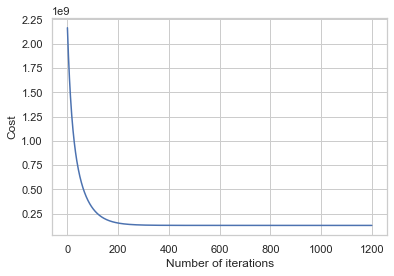

In [39]:
from sklearn.metrics import r2_score              # For calculating R2 Score

#Cost function to calculate cost with every iteration
#Input : X : Training Data
#        y: Training dependent variable
#        theta : Model Coefficeints 
#output: Error (Cost)
def cal_cost(theta, X,y):
    m= len(y)
    predictions = X.dot(theta)
    model_error = predictions - y
    cost = (1/2*m) * np.sum(np.square(model_error))
    return cost

#Gradient descent function to calculate coefficents 
#Input : X : Training Data
#        y: Training dependent variable
#        learning rate : At what learning rate gradient descent should traverse to find global minima
#        iterations: Number of iterations to run gradient descent algorithm
#output: Model Coefficients 
def gradient_descent (X,y,theta,learning_rate,iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,len(theta)))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta - (1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it] = cal_cost(theta,X,y)
    
    return theta, cost_history, theta_history

#Predicor function to predict Y based on coefficients obtained using gradient decent
#Input : test_features : X Test Data 
#        theta: coefficients obtained using gradient decent
#Output: Predicted Y value based on Test data & Coefficients obtained from gradient descent algorithm
def pred(test_features, theta):
    return test_features.dot(theta)


# Algorithm
# Data set reading & EDA to ensure algorith run without previous cell dependency except python lib modules

#Getting given dataset into Dataframe
dataset = pd.read_csv('Data_miniproject.csv')     # Used CSV file is available at same code location

# Rename Weight1 for better clarity while doing data exploration
dataset.rename(columns={"Weight1": "Expanded_Weight"},inplace = True)

#Cost 0 is an outlier and should be dropped for better algorithm 
indexName = dataset[ dataset['Cost'] <= 0].index
dataset.drop(indexName, inplace=True)
dataset.describe()

#Expanded_Weight (Weight1) is exactly same as Weight and does not bring much value. 
drop_cols = ['Expanded_Weight']
dataset = dataset.drop(drop_cols, axis=1)
dataset.head()

# Extract the data set into X & y to process further.
y = dataset.pop('Cost')
X = dataset.copy()

#Standardize features by removing the mean and scaling to unit variance for all given features
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

#Add 1.0 as Col with dataset to accomodate intercept values
X = np.c_[np.ones((len(X),1)),X] 

# Split the data to Training set & Test set. 80% Training Data & 20% Test Data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25)
 
      
#Learning Rate for Algorithm
lr = 0.01

#Number of iterations to execute the Algorithm 
n_iter = 1200

#Coefficient Vector calling as Theta with length as X training data
theta_vector_length = len(X_train[0])

#Initializing all Coefficients with 1
theta = np.ones((theta_vector_length , 1) )

#Convert data into 2D matrix from 1D
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

#Call Gradient descent algorithm 
theta,cost_history,theta_history = gradient_descent(X_train,y_train,theta,lr,n_iter)

#Call predictor function by passing caluculated coefficients and test data 
#and get predicted Y values from test data
y_pred = pred(X_test,theta)

#Calculate Mean Squared Error between True Y value & Predicted Y value
gd_mse = mean_squared_error(y_test,y_pred)

#Calculate RMSE by sqrt of MSE
gd_rmse = math.sqrt(gd_mse)

#Calculate R2 Score using true Y value and Predicted Y Value
gd_r2_value = r2_score(y_test,y_pred,sample_weight=None,multioutput='uniform_average')

#Print all calculated values from gradient decent algorith
print ("GD Model Coefficient : {:0.4f} , {:0.4f} , {:0.4f} , {:0.4f}".format(theta[1][0],theta[2][0],theta[3][0],theta[4][0]) )
print ("GD Intercept         : {:0.4f}".format(theta[0][0]))
print ("GD MSE               : {:0.4f}".format(gd_mse))
print ("GD RMSE              : {:0.4f}".format(gd_rmse))
print ("GD R2 Score          : {:0.4f}".format(gd_r2_value))

# visualising gradient descent 
plt.plot(cost_history) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

# Mini-Batch Gradient Decent Algorithm

MGD Batch Size        :  10
MGD Model Coefficient :  125.9381 , 112.5759 , 32.7344 , 69.4872
MGD Intercept         :  401.7156
MGD MSE               :  11097.6241
MGD RMSE              :  105.3453
MGD R2 Score          :  0.9072


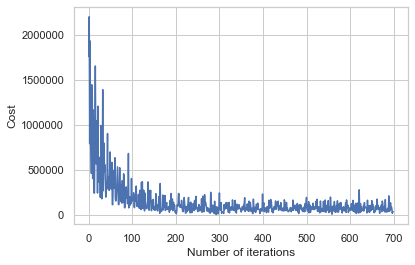

In [40]:
# linear regression using "mini-batch" gradient descent 

# function to compute hypothesis / predictions 
#Input        X : Training Feature Set
#         theta : target coefficients
#Output Dot product of Training data set & Model Coefficients
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
#Input       X  : Training Feature Set
#            y  : Training dependent data
#        theta  : target modelcoefficients
#Output: gradient of error (cost) function  
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  

#Input       X  : Training Feature Set
#            y  : Training dependent data
#        theta  : target model coefficients
#Output: Error for current values of theta
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
#Input      X  : Training Feature Set
#           y  : Training dependent data
#  batch_size  : Batch size to create mini batches
#Output: list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    #data = np.hstack((X, y)) 
    data = np.column_stack((X,y))
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
#Input   X            : Training Feature Set
#        y            : Training dependent data
#        learning rate: At what learning rate gradient descent should traverse to find global minima 
#        batch_size   : Batch size to create mini batches
#        max_iters    : Max number of iterations to converge
#Output: Model Coefficients & reducing error list

def mini_gradientDescent(X, y, learning_rate = 0.001, batch_size = 10,max_iters = 100): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
            
    return theta, error_list 

# Data set reading & EDA to ensure algorith run without previous cell dependency except python lib modules

#Getting given dataset into Dataframe
dataset = pd.read_csv('Data_miniproject.csv')     # Used CSV file is available at same code location

# Rename Weight1 for better clarity while doing data exploration
dataset.rename(columns={"Weight1": "Expanded_Weight"},inplace = True)

#Cost 0 is an outlier and should be dropped for better algorithm 
indexName = dataset[ dataset['Cost'] <= 0].index
dataset.drop(indexName, inplace=True)
dataset.describe()

#Expanded_Weight (Weight1) is exactly same as Weight and does not bring much value. 
drop_cols = ['Expanded_Weight']
dataset = dataset.drop(drop_cols, axis=1)
dataset.head()

# Extract the data set into X & y to process further.
y = dataset.pop('Cost')
X = dataset.copy()

#Standardize features by removing the mean and scaling to unit variance for all given features
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)


#Add 1.0 as Col with dataset to accomodate intercept values
X = np.c_[np.ones((len(X),1)),X] 

# Split the data to Training set & Test set for all the algorithms. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25) # 20% in test set

learning_rate = 0.001 
batch_size = 10
max_iters = 50
theta, error_list = mini_gradientDescent(X_train, y_train, learning_rate, batch_size,max_iters) 

#Convert data into 2D matrix from 1D
y_test = y_test.values.reshape(-1,1)


# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
mini_mse = mean_squared_error(y_test,y_pred)
mini_rmse = math.sqrt(mini_mse)
mini_r2_value = r2_score(y_test,y_pred,sample_weight=None,multioutput='uniform_average')


#Print all calculated values from gradient decent algorithm
print ("MGD Batch Size        : ",batch_size)
print ("MGD Model Coefficient :  {:0.4f} , {:0.4f} , {:0.4f} , {:0.4f}".format(theta[1][0],theta[2][0],theta[3][0],theta[4][0]) )
print ("MGD Intercept         :  {:0.4f}".format(theta[0][0]))
print ("MGD MSE               :  {:0.4f}".format(mini_mse))
print ("MGD RMSE              :  {:0.4f}".format(mini_rmse))
print ("MGD R2 Score          :  {:0.4f}".format(mini_r2_value))

# visualising mini gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 